In [21]:
import glob
import os
import pandas as pd
import numpy as np
import datetime

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
import seaborn as sb
import matplotlib.pyplot as plt

In [24]:
Compare = pd.read_csv('Comparrison.csv')
Compare.head()

,Metrics,Atl Habitat,Lisa Gordon,Habitat Org,Habitat Volunteers,Habitat AmeriCorps,AmeriCorps,NWMA Habitat,SC Habitat,Gwinnett Habitat,...,Athena's Warehouse,9to5 GA,Atlanta Mission,United Way of Greater Atl,Latin American Assoc,Asian Americans Advancing Justice Atl,Atlanta Bike Coalition,Wonder Root,Fernbank Museum,MailChimp
0,Social Authority Rank,42,44,74,49,44,65,34,10,31,...,8,24,42,54,39,36,49,46,41,87
1,Followers,1995,525,1134090,2878,1289,59150,530,374,633,...,513,1124,5418,7758,3607,1677,9408,11178,20359,239284
2,Following,2050,314,5628,1775,1111,824,206,681,776,...,970,886,2632,3620,3003,1368,2888,6064,2428,16573
3,Avg Tweets Week,8,3,50,22,8,20,1,4,3,...,2,9,7,14,4,10,16,45,14,125
4,Avg Followers Day,0,0,349,1,0,16,0,0,0,...,0,0,1,2,1,0,2,3,5,62


In [41]:
corr = Compare.corr()

sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
          )


https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<IPython.core.display.Javascript object>


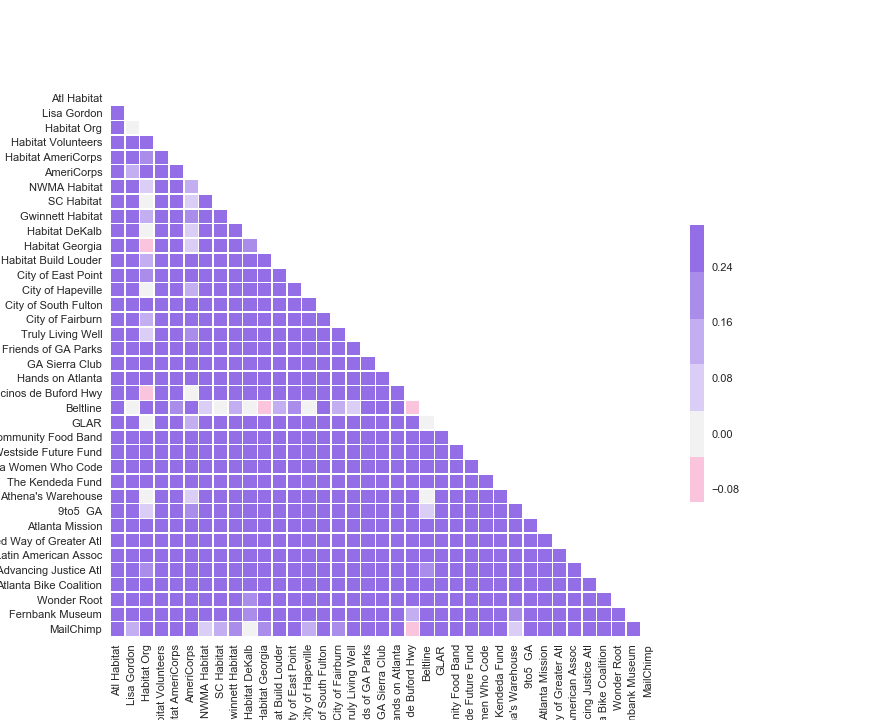

In [42]:
sb.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = Compare

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(2150, 275, s=80, l=55, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
CompareT = Compare.T
CompareT.columns = CompareT.iloc[0]
CompareT.drop(CompareT.index[0], inplace=True)
CompareT = CompareT.astype(np.float64)
CompareT.dtypes
CompareT

Metrics
Social Authority Rank    float64
Followers                float64
Following                float64
Avg Tweets Week          float64
Avg Followers Day        float64
Total tweets             float64
Days Old                 float64
Retweets                 float64
ATContacts               float64
URL                      float64
dtype: object

Metrics,Social Authority Rank,Followers,Following,Avg Tweets Week,Avg Followers Day,Total tweets,Days Old,Retweets,ATContacts,URL
Atl Habitat,42.0,1995.0,2050.0,8.0,0.0,2139.0,1763.0,0.0,0.0,0.0
Lisa Gordon,44.0,525.0,314.0,3.0,0.0,1600.0,2867.0,0.0,0.0,0.0
Habitat Org,74.0,1134090.0,5628.0,50.0,349.0,24595.0,3439.0,12.0,30.0,79.0
Habitat Volunteers,49.0,2878.0,1775.0,22.0,1.0,7321.0,2282.0,44.0,1.0,54.0
Habitat AmeriCorps,44.0,1289.0,1111.0,8.0,0.0,2674.0,2325.0,0.0,0.0,0.0
AmeriCorps,65.0,59150.0,824.0,20.0,16.0,10358.0,3572.0,41.0,12.0,57.0
NWMA Habitat,34.0,530.0,206.0,1.0,0.0,745.0,2684.0,0.0,0.0,0.0
SC Habitat,10.0,374.0,681.0,4.0,0.0,1455.0,2058.0,0.0,0.0,0.0
Gwinnett Habitat,31.0,633.0,776.0,3.0,0.0,886.0,2059.0,0.0,0.0,0.0
Habitat DeKalb,1.0,338.0,402.0,1.0,0.0,446.0,2422.0,0.0,0.0,0.0


In [40]:
corr = CompareT.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<IPython.core.display.Javascript object>


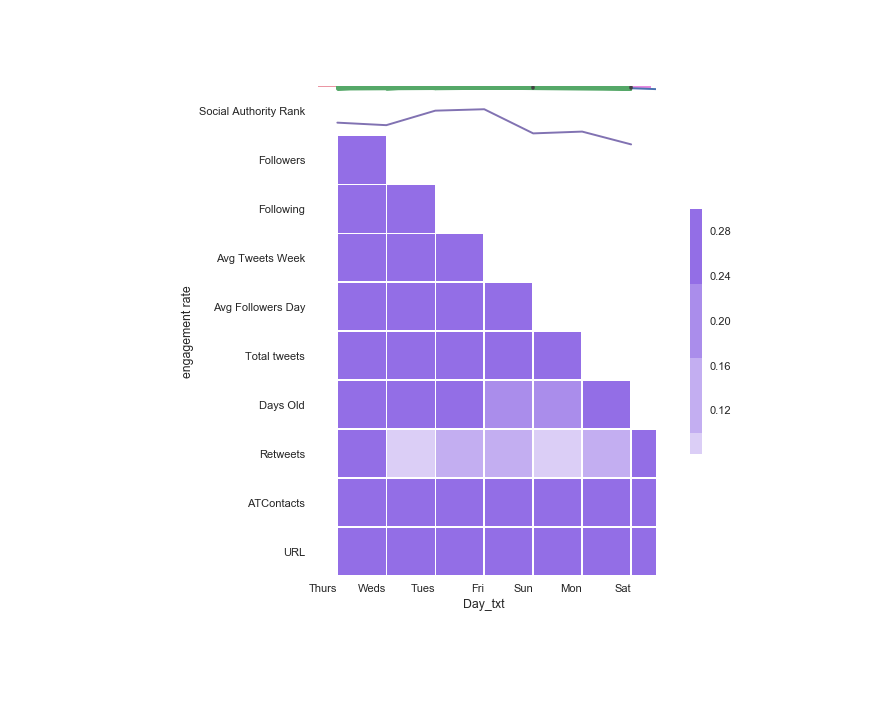

In [43]:
sb.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = CompareT

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(2150, 275, s=80, l=55, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('tweet_activity_metrics_AtlantaHabitat*.csv')], ignore_index = True)

In [45]:
df.describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.0,326.0,326.000000,326.0,326.0,326.000000,326.000000
mean,9.287427e+17,959.208589,14.285276,0.017060,1.343558,0.055215,2.555215,0.656442,1.358896,0.128834,4.389571,0.003067,0.0,0.0,0.015337,0.0,0.0,8.478528,3.779141
std,6.699897e+16,877.448630,14.274934,0.013476,1.380659,0.241827,3.275318,1.443843,2.266145,0.466044,5.747381,0.055385,0.0,0.0,0.123080,0.0,0.0,35.676467,7.000681
min,8.163586e+17,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,8.674469e+17,610.500000,6.000000,0.007810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,9.354459e+17,747.500000,11.000000,0.012282,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,2.000000,2.000000
75%,9.780154e+17,1015.250000,17.000000,0.023547,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,6.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,5.000000,4.000000
max,1.035270e+18,8916.000000,111.000000,0.073446,7.000000,2.000000,21.000000,12.000000,21.000000,4.000000,31.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,568.000000,58.000000


In [46]:
df.tail(1)
df.head(1)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
325,1.002570e+18,https://twitter.com/AtlantaHabitat/status/1002...,We build more than homes.\nDonate Today: https...,2018-06-01 15:18 +0000,840.0,3.0,0.003571,1.0,0.0,1.0,...,-,-,-,-,-,-,-,-,-,-


,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,8.474759e+17,https://twitter.com/AtlantaHabitat/status/8474...,Atlanta Habitat honored for $6M economic impac...,2017-03-30 15:49 +0000,597.0,10.0,0.01675,2.0,0.0,4.0,...,-,-,-,-,-,-,-,-,-,-


In [47]:
df = df[df.columns.drop(list(df.filter(regex='promoted')))]

In [48]:
df['engagement rate'].max()

0.07344632768361582

In [49]:
df.loc[df['engagement rate'].idxmax()]

Tweet id                                                     8.40749e+17
Tweet permalink        https://twitter.com/AtlantaHabitat/status/8407...
Tweet text             @GeorgiaPacific started their 2017 #atlantahab...
time                                              2017-03-12 02:19 +0000
impressions                                                          354
engagements                                                           26
engagement rate                                                0.0734463
retweets                                                               0
replies                                                                0
likes                                                                  1
user profile clicks                                                    0
url clicks                                                             1
hashtag clicks                                                         0
detail expands                                     

In [50]:
dfTime = df.set_index(pd.DatetimeIndex(df['time']))

In [51]:
dfTime.head(1)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
time,,,,,,,,,,,,,,,,,,,,,
2017-03-30 15:49:00,8.474759e+17,https://twitter.com/AtlantaHabitat/status/8474...,Atlanta Habitat honored for $6M economic impac...,2017-03-30 15:49 +0000,597.0,10.0,0.01675,2.0,0.0,4.0,...,0.0,0.0,0.0,0,0,0,0,0,4,4


In [53]:
sb.tsplot(dfTime['engagement rate'])

C:\Users\amber.keller\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [54]:
dfTime['engagement rate'].resample('D').sum().plot()

In [55]:
df.to_csv('TweetActivityMerge.csv')

In [56]:
TweetActivity = pd.read_csv('TweetActivityMerge.csv')
TweetActivity.head(1)


,Unnamed: 0,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,...,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
0,0,8.474759e+17,https://twitter.com/AtlantaHabitat/status/8474...,Atlanta Habitat honored for $6M economic impac...,2017-03-30 15:49 +0000,597.0,10.0,0.01675,2.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,4,4


df['my_dates'] = pd.to_datetime(df['my_dates'])

In [57]:
TweetActivity = TweetActivity.set_index(pd.DatetimeIndex(df['time']))
TweetActivity['time'] = pd.to_datetime(TweetActivity['time'])
TweetActivity.head(1)

,Unnamed: 0,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,...,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
time,,,,,,,,,,,,,,,,,,,,,
2017-03-30 15:49:00,0,8.474759e+17,https://twitter.com/AtlantaHabitat/status/8474...,Atlanta Habitat honored for $6M economic impac...,2017-03-30 15:49:00,597.0,10.0,0.01675,2.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,4,4


df['day_of_week'] = df['my_dates'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

In [58]:
TweetActivity['Day'] = TweetActivity['time'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
TweetActivity['Day_txt'] = TweetActivity['Day'].apply(lambda x: days[x])
TweetActivity.head(1)

,Unnamed: 0,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,...,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements,Day,Day_txt
time,,,,,,,,,,,,,,,,,,,,,
2017-03-30 15:49:00,0,8.474759e+17,https://twitter.com/AtlantaHabitat/status/8474...,Atlanta Habitat honored for $6M economic impac...,2017-03-30 15:49:00,597.0,10.0,0.01675,2.0,0.0,...,0.0,0,0,0,0,0,4,4,3,Thurs


In [59]:
x = TweetActivity['Day']
y = TweetActivity['engagement rate']
plt.plot(x,y)

In [60]:
TweetActivity['engagement rate'].resample('M').sum().plot()

In [61]:
TweetActivity['engagement rate'].groupby(TweetActivity['Day_txt']).sum().plot()

In [62]:
sb.barplot(x=TweetActivity['Day_txt'], y=TweetActivity['engagement rate'])


<IPython.core.display.Javascript object>


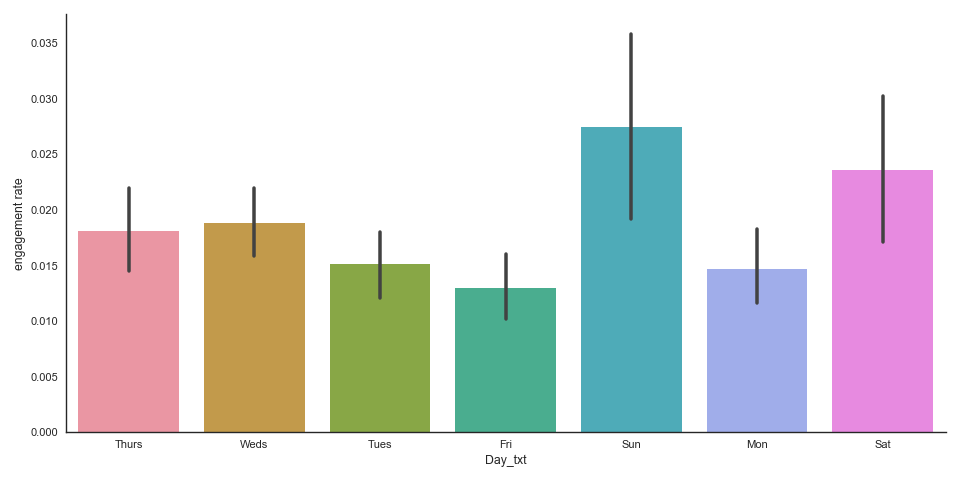

In [63]:
sb.factorplot(x="Day_txt", y="engagement rate", data=TweetActivity, kind="bar", size=6, aspect=2)

<IPython.core.display.Javascript object>


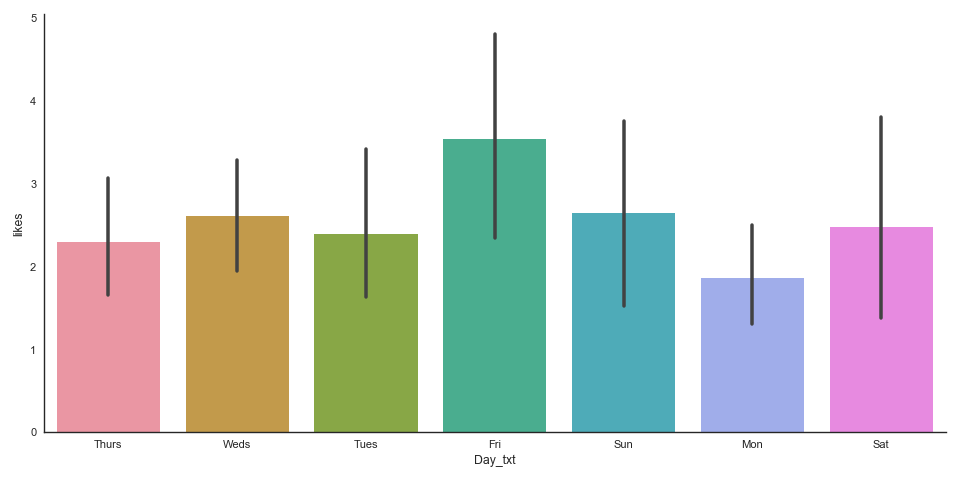

<IPython.core.display.Javascript object>


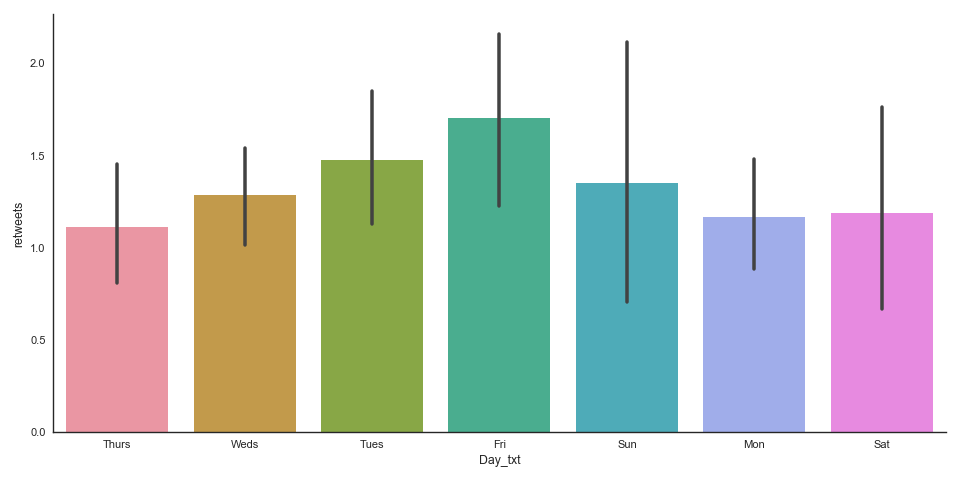

In [64]:
sb.factorplot(x="Day_txt", y="likes", data=TweetActivity, kind="bar", size=6, aspect=2)
sb.factorplot(x="Day_txt", y="retweets", data=TweetActivity, kind="bar", size=6, aspect=2)